In [89]:
# Loading Libraries
library(cowplot)
library(datateachr)
library(digest)
library(infer)
library(repr)
library(taxyvr)
library(tidyverse)

In [88]:
# Reading the data from our GitHub repo
url  <- "https://raw.githubusercontent.com/PrayusShrestha/stat-201-project/main/data/student-mat.csv?token=GHSAT0AAAAAABN4PHVTJQ33FHYO4ZMGRYZYYRAMDQA"
raw_data  <- read_delim(url, delim = ";")
head(raw_data)

# TODO: talk about how the data is already tidy


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_character(),
  age = col_double(),
  Medu = col_double(),
  Fedu = col_double(),
  traveltime = col_double(),
  studytime = col_double(),
  failures = col_double(),
  famrel = col_double(),
  freetime = col_double(),
  goout = col_double(),
  Dalc = col_double(),
  Walc = col_double(),
  health = col_double(),
  absences = col_double(),
  G1 = col_double(),
  G2 = col_double(),
  G3 = col_double()
)
ℹ Use `spec()` for the full column specifications.




school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,⋯,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GP,F,18,U,GT3,A,4,4,at_home,teacher,⋯,4,3,4,1,1,3,6,5,6,6
GP,F,17,U,GT3,T,1,1,at_home,other,⋯,5,3,3,1,1,3,4,5,5,6
GP,F,15,U,LE3,T,1,1,at_home,other,⋯,4,3,2,2,3,3,10,7,8,10
GP,F,15,U,GT3,T,4,2,health,services,⋯,3,2,2,1,1,5,2,15,14,15
GP,F,16,U,GT3,T,3,3,other,other,⋯,4,3,2,1,2,5,4,6,10,10
GP,M,16,U,LE3,T,4,3,services,other,⋯,5,4,2,1,2,5,10,15,15,15


In [67]:
data  <- raw_data  %>% 
    mutate(final_grade = G3)
p_internet <- data %>%
    group_by(internet) %>%
    tally()

# p_address <- data %>%
#     group_by(address) %>%
#     tally()


# p_nursery <- data %>%
#     group_by(nursery) %>%
#     tally()

# p_pstatus <- data %>%
#     group_by(Pstatus) %>%
#     tally()

p_internet
# p_pstatus
# p_nursery
# p_address

,internet,n
,<chr>,<int>
1,no,66
2,yes,329


In [85]:
# Selecting the relevant columns
data  <- data  %>% 
    select(internet, final_grade)

# Generating some statistics (standard deviation and mean)
data_summary  <- data  %>% 
    group_by(internet)  %>% 
    summarize(sd = sd(final_grade),
              mean = mean(final_grade))
head(data)
data_summary

internet,final_grade
<chr>,<dbl>
no,6
yes,6
yes,10
yes,15
no,10
yes,15


,internet,sd,mean
,<chr>,<dbl>,<dbl>
1,no,4.485797,9.409091
2,yes,4.580494,10.617021


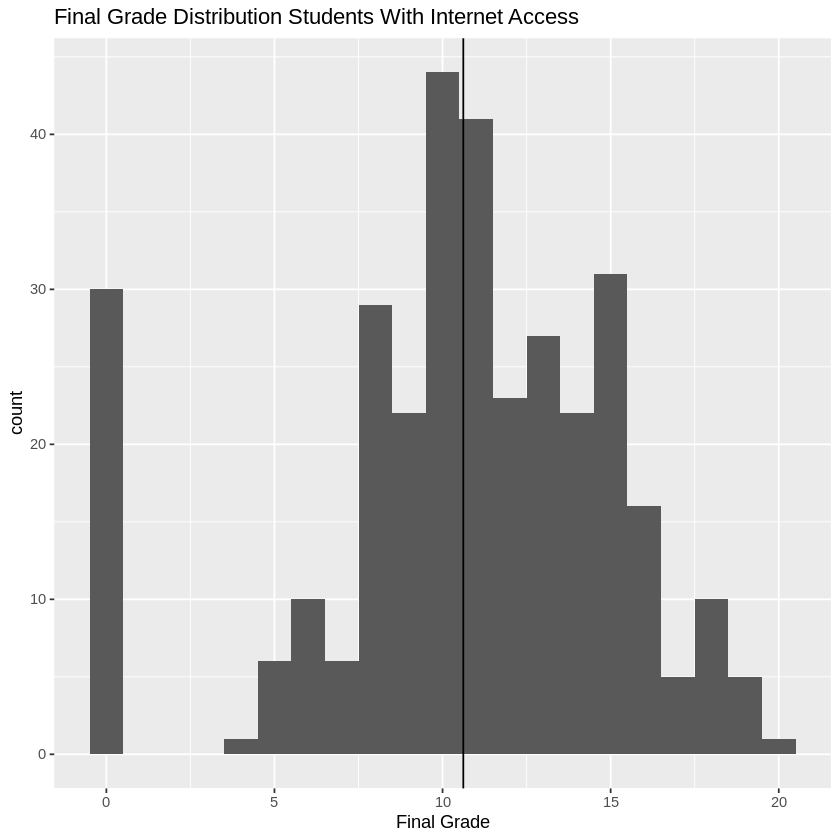

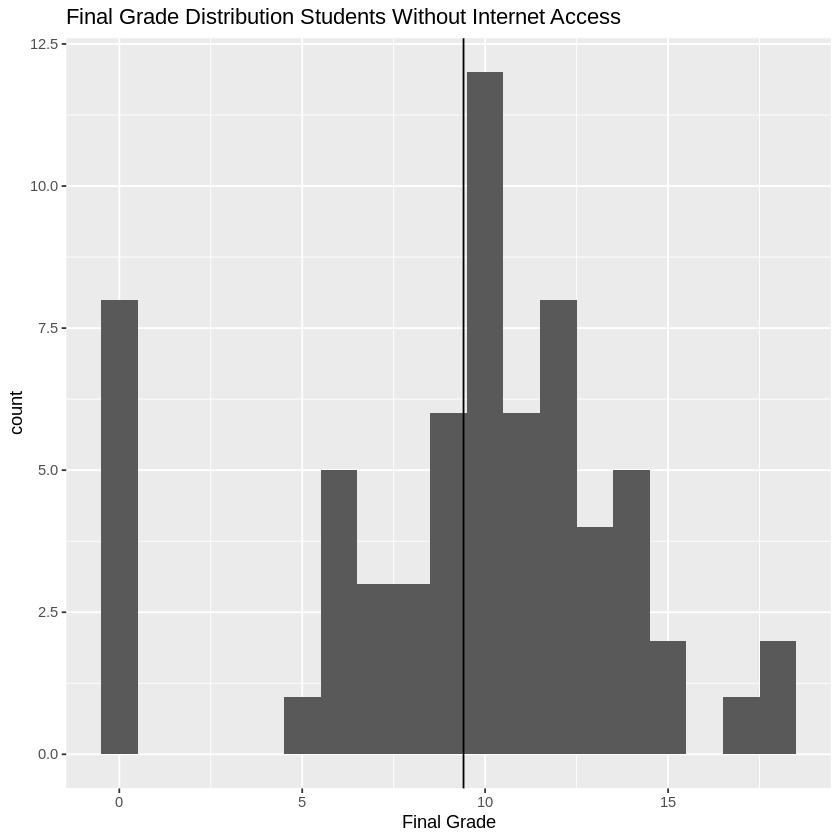

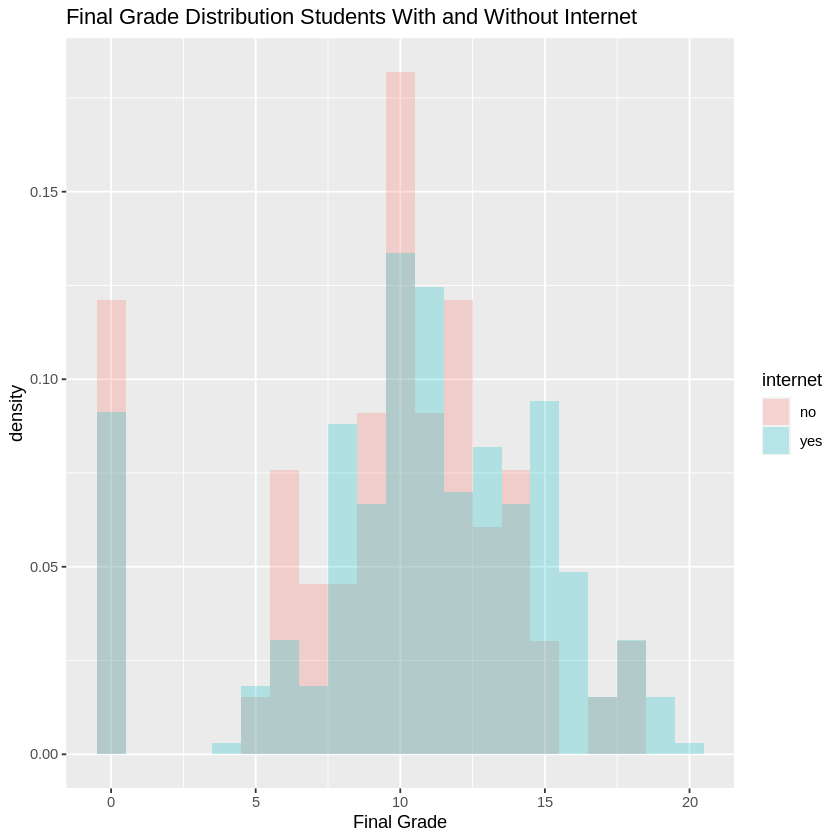

In [75]:
# 3 histograms of the relevant raw data

# TODO: number graphs and tables


# Plot 1: Final Grade Distribution Students Without Internet Access
plot_no_internet <- data  %>% 
    filter(internet == "no")  %>% 
    ggplot(aes(x=final_grade)) +
    geom_histogram(binwidth = 1) + 
    geom_vline(xintercept = data_summary$mean[1]) + 
    xlab("Final Grade") + 
    ggtitle("Final Grade Distribution Students Without Internet Access")

# Plot 2: Final Grade Distribution Students With Internet Access
plot_have_internet <- data  %>% 
    filter(internet == "yes")  %>% 
    ggplot(aes(x = final_grade)) +
    geom_histogram(binwidth = 1) +
    geom_vline(xintercept = data_summary$mean[2]) + 
    xlab("Final Grade") + 
    ggtitle("Final Grade Distribution Students With Internet Access")

# Plot 1: Final Grade Distribution Students With and Without Internet
plot_both <- ggplot(data, aes(x = final_grade, fill = internet)) + 
    geom_histogram(binwidth = 1, alpha = 0.25, position = "identity", aes(y = ..density..)) + 
    xlab("Final Grade") + 
    ggtitle("Final Grade Distribution Students With and Without Internet")
plot_have_internet
plot_no_internet
plot_both

# added comment to test